In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

import numpy as np


C:\Users\carlo\AppData\Local\Temp\ipykernel_8592\82214995.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
df = pd.read_csv('availability.csv')

df.rename(columns={'last_update': 'time_of_day'}, inplace=True)
df = df.drop(columns=["status"])
df['time_of_day'] = pd.to_datetime(df['time_of_day'])

specified_date_time = pd.to_datetime('2024-02-25 15:03:04')

df = df[df['time_of_day'] >= specified_date_time]

df

,station_id,time_of_day,available_bike_stands,bike_stands,available_bikes
697,1,2024-02-25 15:03:41,6,31,25
698,1,2024-02-25 15:13:45,4,31,27
699,1,2024-02-25 15:34:28,7,31,24
700,1,2024-02-25 15:43:58,6,31,25
701,1,2024-02-25 15:44:15,6,31,25
...,...,...,...,...,...
565009,117,2024-03-20 22:19:17,29,40,11
565010,117,2024-03-20 22:23:42,29,40,11
565011,117,2024-03-20 22:28:23,29,40,11
565012,117,2024-03-20 22:38:28,29,40,11


In [9]:
df2 = pd.read_csv('weather.csv')
df2['time_of_day'] = pd.to_datetime(df2['time_of_day'])
df2 = df2.drop(columns=["main"])

df2

,time_of_day,station_id,description,temperature,wind_speed
0,2024-02-25 15:03:04,1,broken clouds,8,9.77
1,2024-02-25 15:03:04,9,broken clouds,8,9.77
2,2024-02-25 15:03:04,14,broken clouds,8,9.77
3,2024-02-25 15:03:04,27,broken clouds,8,9.77
4,2024-02-25 15:03:04,36,broken clouds,8,9.77
...,...,...,...,...,...
198240,2024-03-20 22:40:19,106,clear sky,5,4.12
198241,2024-03-20 22:40:19,107,clear sky,6,4.12
198242,2024-03-20 22:40:20,108,clear sky,5,4.12
198243,2024-03-20 22:40:20,112,clear sky,6,4.12


In [10]:
merged_df = pd.merge_asof(df.sort_values('time_of_day'), df2.sort_values('time_of_day'), 
                          by='station_id', on='time_of_day', direction='nearest')

merged_df['month'] = pd.to_datetime(merged_df['time_of_day']).dt.month
merged_df['day'] = pd.to_datetime(merged_df['time_of_day']).dt.day
merged_df['hour'] = pd.to_datetime(merged_df['time_of_day']).dt.hour
merged_df['minute'] = pd.to_datetime(merged_df['time_of_day']).dt.minute




In [11]:
merged_df.head(10)




,station_id,time_of_day,available_bike_stands,bike_stands,available_bikes,description,temperature,wind_speed,month,day,hour,minute
0,42,2024-02-25 15:03:04,0,30,30,broken clouds,7,9.77,2,25,15,3
1,51,2024-02-25 15:03:06,34,40,6,broken clouds,8,9.77,2,25,15,3
2,32,2024-02-25 15:03:06,0,30,30,broken clouds,8,9.77,2,25,15,3
3,18,2024-02-25 15:03:07,6,30,24,broken clouds,7,9.77,2,25,15,3
4,57,2024-02-25 15:03:08,23,23,0,broken clouds,7,9.77,2,25,15,3
5,82,2024-02-25 15:03:11,21,22,1,broken clouds,7,9.77,2,25,15,3
6,92,2024-02-25 15:03:12,11,40,29,broken clouds,7,9.77,2,25,15,3
7,17,2024-02-25 15:03:13,12,20,8,broken clouds,7,9.77,2,25,15,3
8,52,2024-02-25 15:03:14,20,32,12,broken clouds,8,9.77,2,25,15,3
9,27,2024-02-25 15:03:15,1,20,19,broken clouds,8,9.77,2,25,15,3


In [12]:

new_df = pd.get_dummies(merged_df, columns=["description","station_id"], prefix='category')


In [13]:
new_df

,time_of_day,available_bike_stands,bike_stands,available_bikes,temperature,wind_speed,month,day,hour,minute,...,category_108,category_109,category_110,category_111,category_112,category_113,category_114,category_115,category_116,category_117
0,2024-02-25 15:03:04,0,30,30,7,9.77,2,25,15,3,...,False,False,False,False,False,False,False,False,False,False
1,2024-02-25 15:03:06,34,40,6,8,9.77,2,25,15,3,...,False,False,False,False,False,False,False,False,False,False
2,2024-02-25 15:03:06,0,30,30,8,9.77,2,25,15,3,...,False,False,False,False,False,False,False,False,False,False
3,2024-02-25 15:03:07,6,30,24,7,9.77,2,25,15,3,...,False,False,False,False,False,False,False,False,False,False
4,2024-02-25 15:03:08,23,23,0,7,9.77,2,25,15,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490185,2024-03-20 22:49:29,26,30,4,6,4.12,3,20,22,49,...,False,False,False,False,False,False,False,False,False,False
490186,2024-03-20 22:49:33,27,35,8,5,4.12,3,20,22,49,...,True,False,False,False,False,False,False,False,False,False
490187,2024-03-20 22:49:34,27,40,13,6,4.12,3,20,22,49,...,False,False,False,False,False,False,False,False,False,False
490188,2024-03-20 22:49:37,37,40,3,6,4.12,3,20,22,49,...,False,False,False,False,False,False,False,False,False,False


In [14]:
new_df.to_csv("ml_data.csv")


In [14]:
ml_data = pd.read_csv("ml_data.csv")
ml_data=ml_data.astype("int64")
ml_data

ValueError: invalid literal for int() with base 10: '2024-02-25 15:03:04'

In [89]:
ml_data = merged_df
ml_data = ml_data.drop(columns=["description"])

ml_data=ml_data.astype("int64")
ml_data

,station_id,available_bike_stands,bike_stands,available_bikes,temperature,wind_speed,month,day,hour,minute
0,42,0,30,30,7,9,2,25,15,3
1,51,34,40,6,8,9,2,25,15,3
2,32,0,30,30,8,9,2,25,15,3
3,18,6,30,24,7,9,2,25,15,3
4,57,23,23,0,7,9,2,25,15,3
...,...,...,...,...,...,...,...,...,...,...
490185,28,26,30,4,6,4,3,20,22,49
490186,108,27,35,8,5,4,3,20,22,49
490187,56,27,40,13,6,4,3,20,22,49
490188,90,37,40,3,6,4,3,20,22,49


In [90]:
mean = ml_data.mean()
std = ml_data.std()

# Standardize the DataFrame
ml_data = (ml_data - mean) / std
ml_data

,station_id,available_bike_stands,bike_stands,available_bikes,temperature,wind_speed,month,day,hour,minute
0,-0.470606,-1.739741,-0.263872,1.772649,-0.413361,1.259114,-2.099147,1.362958,0.468285,-1.533345
1,-0.205707,1.284113,1.079045,-0.627791,-0.084191,1.259114,-2.099147,1.362958,0.468285,-1.533345
2,-0.764937,-1.739741,-0.263872,1.772649,-0.084191,1.259114,-2.099147,1.362958,0.468285,-1.533345
3,-1.177002,-1.206119,-0.263872,1.172539,-0.413361,1.259114,-2.099147,1.362958,0.468285,-1.533345
4,-0.029108,0.305807,-1.203915,-1.227901,-0.413361,1.259114,-2.099147,1.362958,0.468285,-1.533345
...,...,...,...,...,...,...,...,...,...,...
490185,-0.882670,0.572618,-0.263872,-0.827828,-0.742531,-0.643988,0.476383,0.761900,1.512799,1.111039
490186,1.471983,0.661555,0.407587,-0.427754,-1.071701,-0.643988,0.476383,0.761900,1.512799,1.111039
490187,-0.058541,0.661555,1.079045,0.072337,-0.742531,-0.643988,0.476383,0.761900,1.512799,1.111039
490188,0.942186,1.550924,1.079045,-0.927846,-0.742531,-0.643988,0.476383,0.761900,1.512799,1.111039


In [91]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [92]:
class BikeDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, row):
        feature = torch.tensor(self.features.iloc[row].values, dtype=torch.int64)
        target = torch.tensor(self.targets.iloc[row], dtype=torch.int64).unsqueeze(-1)
        return feature, target


In [93]:
X = ml_data.drop(columns=['available_bikes'])  # Features
y = ml_data['available_bikes']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_dataset = BikeDataset(X_train, y_train)
test_dataset = BikeDataset(X_test, y_test)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [105]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):

        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
NUM_EPOCHS =5
print(model)


NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=9, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)


In [109]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device).float(), y.to(device).float()

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  
  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader) 
  return train_loss, train_acc 

# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader): 
      # Send data to the target device
      X, y = X.to(device).float(), y.to(device).float()

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc
     

In [110]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5, 
          device=device):
  
  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    
    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  
  # 6. Return the filled results at the end of the epochs
  return results

In [111]:
# Train model 1
model_1_results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

 20%|██        | 1/5 [00:22<01:28, 22.23s/it]

Epoch: 0 | Train loss: 0.2752 | Train acc: 39.4163 | Test loss: 0.2327 | Test acc: 39.3916


 40%|████      | 2/5 [00:43<01:05, 21.74s/it]

Epoch: 1 | Train loss: 0.2275 | Train acc: 39.4163 | Test loss: 0.2241 | Test acc: 39.3916


 60%|██████    | 3/5 [01:06<00:44, 22.36s/it]

Epoch: 2 | Train loss: 0.2212 | Train acc: 39.4163 | Test loss: 0.2189 | Test acc: 39.3916


 80%|████████  | 4/5 [01:29<00:22, 22.55s/it]

Epoch: 3 | Train loss: 0.2169 | Train acc: 39.4163 | Test loss: 0.2151 | Test acc: 39.3916


100%|██████████| 5/5 [01:53<00:00, 22.66s/it]

Epoch: 4 | Train loss: 0.2137 | Train acc: 39.4163 | Test loss: 0.2121 | Test acc: 39.3916


In [112]:

# Get the model_0_results keys
model_1_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [119]:

def plot_loss_curves(results: dict[str, list[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend() 

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

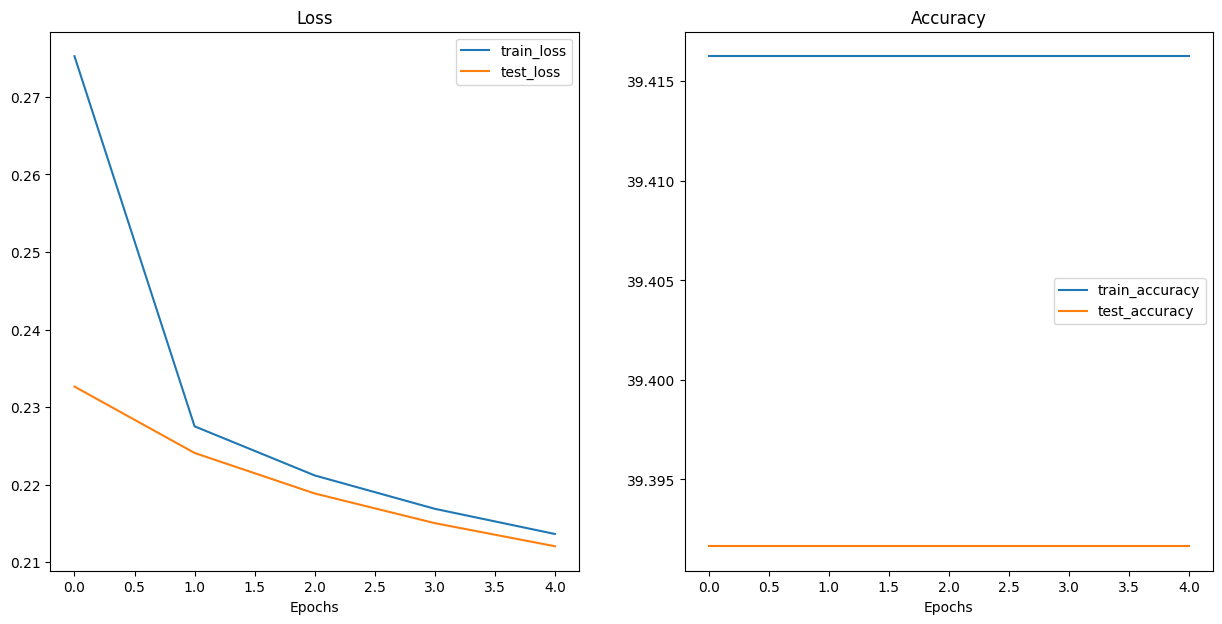

In [120]:


plot_loss_curves(model_1_results) 


In [96]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device).float(), y.to(device).float()
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
    
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [97]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device).float(), y.to(device).float()
            
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.int64).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [98]:
epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model1 = train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.695748  [   64/343133]
loss: 0.407194  [ 6464/343133]
loss: 0.261753  [12864/343133]
loss: 0.456041  [19264/343133]
loss: 0.311044  [25664/343133]
loss: 0.356231  [32064/343133]
loss: 0.248853  [38464/343133]
loss: 0.386066  [44864/343133]
loss: 0.300602  [51264/343133]
loss: 0.336284  [57664/343133]
loss: 0.283040  [64064/343133]
loss: 0.285564  [70464/343133]
loss: 0.265870  [76864/343133]
loss: 0.194979  [83264/343133]
loss: 0.309837  [89664/343133]
loss: 0.222639  [96064/343133]
loss: 0.207302  [102464/343133]
loss: 0.268049  [108864/343133]
loss: 0.237745  [115264/343133]
loss: 0.299284  [121664/343133]
loss: 0.294828  [128064/343133]
loss: 0.238298  [134464/343133]
loss: 0.220290  [140864/343133]
loss: 0.288216  [147264/343133]
loss: 0.233249  [153664/343133]
loss: 0.261882  [160064/343133]
loss: 0.227105  [166464/343133]
loss: 0.249949  [172864/343133]
loss: 0.205563  [179264/343133]
loss: 0.269546  [185664/343133]
loss: 0.196844  

Epoch 1
-------------------------------
Loss: 0.244597  [   64/343133]
Loss: 23.672446  [ 6464/343133]
Loss: 46.678591  [12864/343133]
Loss: 70.110300  [19264/343133]
Loss: 93.413430  [25664/343133]
Loss: 116.666364  [32064/343133]
Loss: 139.633924  [38464/343133]
Loss: 162.229363  [44864/343133]
Loss: 185.193629  [51264/343133]
Loss: 208.225393  [57664/343133]
Loss: 231.692699  [64064/343133]
Loss: 254.897296  [70464/343133]
Loss: 277.831216  [76864/343133]
Loss: 300.457399  [83264/343133]
Loss: 323.858495  [89664/343133]
Loss: 346.893119  [96064/343133]
Loss: 370.118699  [102464/343133]
Loss: 392.522615  [108864/343133]
Loss: 415.223356  [115264/343133]
Loss: 438.222563  [121664/343133]
Loss: 461.185266  [128064/343133]
Loss: 484.615522  [134464/343133]
Loss: 507.728207  [140864/343133]
Loss: 530.943749  [147264/343133]
Loss: 553.707549  [153664/343133]
Loss: 576.208315  [160064/343133]
Loss: 598.629765  [166464/343133]
Loss: 620.815079  [172864/343133]
Loss: 643.678817  [179264/3431

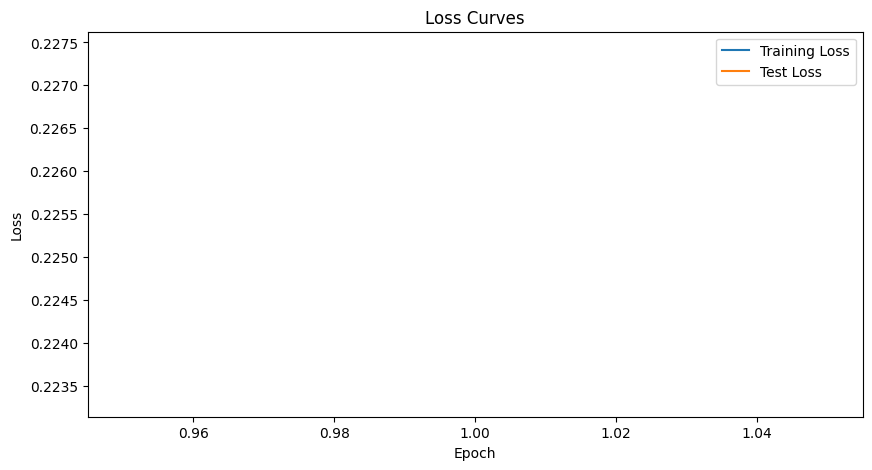

In [99]:
import matplotlib.pyplot as plt

# Lists to store training and test losses
train_losses = []
test_losses = []

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device).float(), y.to(device).float()
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
    
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        total_loss += loss.item()

        if batch % 100 == 0:
            current = (batch + 1) * len(X)
            print(f"Loss: {total_loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    # Calculate average loss for the epoch
    avg_loss = total_loss / len(dataloader)
    train_losses.append(avg_loss)

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device).float(), y.to(device).float()
            
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.int64).sum().item()
    
    # Calculate average loss and accuracy for the epoch
    test_loss /= len(dataloader)
    accuracy = correct / size
    print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    test_losses.append(test_loss)

epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()


MSELoss()


In [79]:
# Choose a sample from the test set (for example, the first sample)
sample_index = 10
sample = X_test.iloc[sample_index]  # Assuming X_test is your test features tensor

# Prepare the sample for input to the model
sample_tensor = torch.tensor(sample, dtype=torch.float32).unsqueeze(0).to(device)  # Add batch dimension

# Pass the sample through the model to get the prediction output
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    prediction = model(sample_tensor)

# Process the prediction output}
predicted_value = prediction.item()  # Assuming the model outputs a single value
print("Predicted value:", predicted_value)


Predicted value: 41.04500961303711


C:\Users\carlo\AppData\Local\Temp\ipykernel_3524\3811007929.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_tensor = torch.tensor(sample, dtype=torch.float32).unsqueeze(0).to(device)  # Add batch dimension


In [66]:
# Check if X_test is empty or if index 0 does not exist
if not X_test.empty and 0 in X_test.index:
    sample = X_test.iloc[sample_index]  # Access sample using iloc
    # Prepare and process the sample as before
else:
    print("X_test is empty or index 0 does not exist.")


X_test is empty or index 0 does not exist.


In [80]:
sample1 = y_test.iloc[10]  # Assuming X_test is your test features tensor
sample1

40